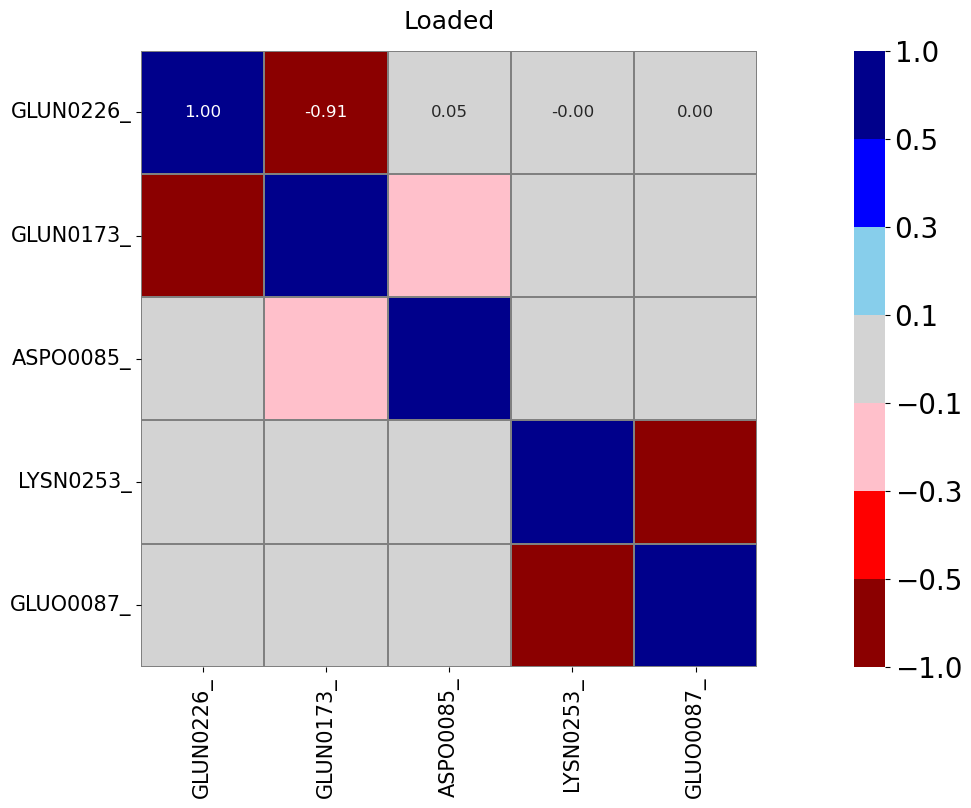

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap, BoundaryNorm
import weighted_correlation as wc


def renameOrderResidues(df):
    # Modify this function as per your requirement
    df = df.rename(columns={col: col.strip() for col in df.columns})  # Example: strip whitespace from column names
    return df
# Load data from the CSV file
df_csv = pd.read_csv("NDH-1_CL4.csv")

# Rename and order residues (assuming this function processes the DataFrame appropriately)
df = renameOrderResidues(df_csv)

# Calculate the weighted correlation score
df_correlation = wc.WeightedCorr(df=df, wcol='Count')(method='pearson')

# Drop residues based on correlation criteria
def dropCorrCriterion(data_frame, cutoff=0.001):
    for i in data_frame.columns:
        if list(abs(data_frame[i]) >= cutoff).count(True) == 1:
            data_frame.drop(i, inplace=True)
            data_frame.drop(i, axis=1, inplace=True)
    return data_frame

df_corr_drop = dropCorrCriterion(df_correlation)

# Plot the heatmap
plt.figure(figsize=(25, 8))
cmap = ListedColormap(["darkred", "red", "pink", "lightgray", "skyblue", "blue", 'darkblue'])
bounds = [-1.0, -0.5, -0.3, -0.1, 0.1, 0.3, 0.5, 1.0]
norm = BoundaryNorm(bounds, cmap.N)

heatmap = sns.heatmap(
    df_correlation, 
    annot=True, 
    linecolor="gray", 
    cmap=cmap, 
    norm=norm, 
    square=True, 
    fmt=".2f", 
    linewidths=.01, 
    annot_kws={"fontsize": 12}
)
heatmap.set_title('Loaded', fontdict={'fontsize': 18}, pad=16)
plt.ylabel(None)
plt.xlabel(None)
plt.yticks(fontsize=15, rotation=0)
plt.xticks(fontsize=15, rotation=90)

# Customize colorbar
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)

# Save the plot
plt.savefig("corr.pdf", dpi=600, bbox_inches='tight')
